## Exploratory data analysis

Author: Cristian Salinas Talamilla

EL siguiente proceso tiene por finalidad poner en practica las herramientas de limpieza, exploración y análisis de datos del dataset de Properatti. 

1. Efectuar una limpieza del dataset provisto. Particularmente, deberán diseñar estrategias para lidiar con los datos perdidos en ciertas variables.

2. Realizar un análisis descriptivo de las principales variables.

3. Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

### Objetivo 1 - Filtras columnas e instancias de interés

En esta sección se busca reducir el set de datos a modo de obtener un dataset mas representativo desde el punto de vista predictivo.

Se explorarán algunas columnas categóricas o de tipo 'Object' para filtrar el dataset y así reducir el número de instancias a estudiar.

In [294]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [295]:
data = pd.read_csv('./Data/properatti.csv', index_col= 0).reindex()

In [296]:
data.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0000,"-34.6618237,-58.5088387",-34.6618,-58.5088,...,40.0000,1127.2727,1550.0000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0000,"-34.9038831,-57.9643295",-34.9039,-57.9643,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0000,"-34.6522615,-58.5229825",-34.6523,-58.5230,...,55.0000,1309.0909,1309.0909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0000,"-34.6477969,-58.5164244",-34.6478,-58.5164,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0000,"-38.0026256,-57.5494468",-38.0026,-57.5494,...,35.0000,1828.5714,1828.5714,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


Explorando solo las variables categóricas se obtiene que:

1. 'operation' posee 1 solo valor unico. Es decir, se eliminará por no representar variabilidad.
2. 'country_name' posee 1 solo valor unico. Es decir, se eliminará por no representar variabilidad.

Las demás variables se explorarán en detalle mas adelante. 

In [297]:
data.select_dtypes('object').describe(include='all').T

,count,unique,top,freq
operation,121220,1,sell,121220
property_type,121220,4,apartment,71065
place_name,121197,1060,Córdoba,9254
place_with_parent_names,121220,1164,|Argentina|Santa Fe|Rosario|,8504
country_name,121220,1,Argentina,121220
state_name,121220,28,Capital Federal,32316
lat-lon,69670,47203,"-34.4026444,-58.6684776",312
currency,100809,4,USD,87587
properati_url,121220,121220,http://www.properati.com.ar/15bo8_venta_ph_mat...,1
description,121218,104055,AVISO LEGAL: Las descripciones arquitectónicas...,358


In [298]:
data = data.drop(['operation','country_name' ], axis=1)

A continuación se realiza una descripción de las variables cuantitativas o de tipo float.

In [299]:
data.select_dtypes(np.float).describe().T

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_89482/608560137.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.select_dtypes(np.float).describe().T


,count,mean,std,min,25%,50%,75%,max
geonames_id,102503.0000,3574442.3179,354130.6242,3427208.0000,3430234.0000,3433910.0000,3836668.0000,6948895.0000
lat,69670.0000,-34.6262,1.9809,-54.8240,-34.6691,-34.5980,-34.4413,4.5458
lon,69670.0000,-59.2663,2.2999,-75.6789,-58.7270,-58.4801,-58.3959,-53.7333
price,100810.0000,468525.9254,2260100.5891,0.0000,110000.0000,185000.0000,420000.0000,650000000.0000
price_aprox_local_currency,100810.0000,4229396.8287,6904714.1256,0.0000,1583309.4400,2558452.5000,4675792.5000,821271104.3000
price_aprox_usd,100810.0000,239700.5769,391323.8757,0.0000,89733.8800,145000.0000,265000.0000,46545445.0000
surface_total_in_m2,81892.0000,233.7953,1782.2221,0.0000,50.0000,84.0000,200.0000,200000.0000
surface_covered_in_m2,101313.0000,133.0502,724.3515,0.0000,45.0000,75.0000,150.0000,187000.0000
price_usd_per_m2,68617.0000,2160.0869,2759.2886,0.6000,1218.1818,1800.0000,2486.4118,206333.3333
price_per_m2,87658.0000,6912.2157,28378.6447,1.5102,1550.0000,2213.1148,3355.5486,3999999.9600


La variable state_name posee 28 valores unicos, se revisarán la cantidad de registros por cada valor unicos. El objetivo de esto es encontrar el state_name con mayor cantidad de registros para poder trabajar sobre él. En este caso state_name corresponde a la Provincia y Localicad donde esta ubicada cada registro.

In [300]:
placename = pd.DataFrame(data['state_name'].value_counts())
placename['%'] = placename['state_name']/data.shape[0]*100

In [301]:
placename

,state_name,%
Capital Federal,32316,26.6590
Bs.As. G.B.A. Zona Norte,25560,21.0856
Bs.As. G.B.A. Zona Sur,13952,11.5097
Córdoba,12069,9.9563
Santa Fe,10172,8.3914
Buenos Aires Costa Atlántica,10006,8.2544
Bs.As. G.B.A. Zona Oeste,9322,7.6902
Buenos Aires Interior,2291,1.8900
Río Negro,808,0.6666
Neuquén,733,0.6047


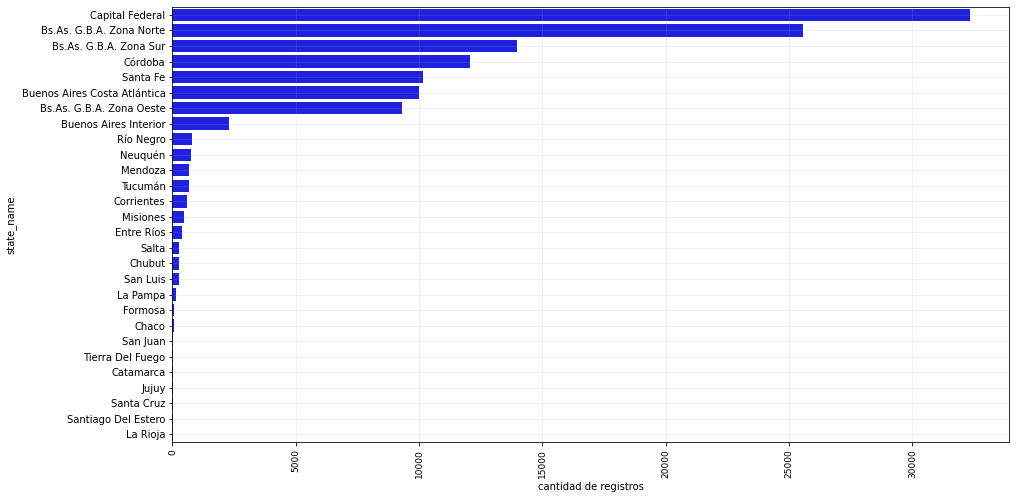

In [302]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x= 'state_name',
            y= placename.index,
            color='blue', data= placename)
plt.xticks(rotation=90, size=9)
plt.grid(axis="x", alpha=0.2)
plt.grid(axis="y", alpha=0.2)
plt.xlabel('cantidad de registros')
plt.ylabel('state_name')
plt.show()

Capital Federal, Bs.As. G.B.A. Zona Norte y Bs.As. G.B.A. Zona Sur	posee en 58% de todos los registros del dataset. Es posible que los precios de las propiedades estén relacionados con la posicioón geográfica (zonas, barrios, cercania a servicios) de los inmuebles. Por ello es necesario seleccionar un conjunto de datos que guarde coherencia con las ubicaciones. 

Para seleccionar la zona donde se realizará el trabajo de limpieza y análisis de los datos se investigo la cantidad de valores nulos en el top 5 de zonas del dataset, esto es:
```
['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur',
       'Córdoba', 'Santa Fe']```

In [303]:
#top 5 state_names
placename.index[:5]

Index(['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur',
       'Córdoba', 'Santa Fe'],
      dtype='object')

In [304]:
states = placename.index[:5]
data2= pd.DataFrame(columns=placename.index[:5], index= data.columns)
for state in states:
    data2[state] = data.loc[data['state_name']==state].isna().sum()/data.loc[data['state_name']==state].shape[0]*100

In [305]:
data2.sort_values('Capital Federal', ascending= False)

,Capital Federal,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Sur,Córdoba,Santa Fe
floor,90.6888,93.0086,98.0075,89.3363,95.1337
expenses,79.6014,87.9460,87.2635,91.6646,96.8934
rooms,52.5777,72.8482,79.3291,67.7769,67.7055
price_usd_per_m2,27.4848,31.9053,55.7554,69.5584,61.0696
lat-lon,26.4451,55.2504,57.2176,57.5607,47.0999
lat,26.4451,55.2504,57.2176,57.5607,47.0999
lon,26.4451,55.2504,57.2176,57.5607,47.0999
surface_total_in_m2,18.1922,26.6158,49.0467,58.2070,32.3339
price_per_m2,15.4475,11.9014,28.9923,46.5076,54.0208
price_aprox_usd,10.2055,5.8764,13.3816,25.1139,46.7853


In [306]:
data2.loc[data2['Capital Federal']>0].mean().round(2)

Capital Federal            26.0500
Bs.As. G.B.A. Zona Norte   35.1200
Bs.As. G.B.A. Zona Sur     42.5100
Córdoba                    45.6500
Santa Fe                   47.9700
dtype: float64

A modo de conclusión, ```Capital Federal``` es la que menos valores nulos posee. Con lo cual representa un buen criterio de filtro para seguir trabajando en la exploración de las demas variales y limpieza o asignación de valores nulos.

In [307]:
data_bsas = data.loc[data['state_name']=='Capital Federal'].reset_index(drop=True)
data_bsas.sample(3)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
17974,store,Capital Federal,|Argentina|Capital Federal|,Capital Federal,3433955.0000,"-34.6428675967,-58.4376599743",-34.6429,-58.4377,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1ahcu_venta_local_...,AVISO LEGAL: Las descripciones arquitectónicas...,Local en P.Chacabuco,https://thumbs4.properati.com/5/yyMiu8BHQI9KXC...
29691,apartment,Agronomía,|Argentina|Capital Federal|Agronomía|,Capital Federal,3436487.0000,"-34.6004426729,-58.4874138526",-34.6004,-58.4874,209000.0000,USD,...,84.0000,2271.7391,2488.0952,NaN,NaN,1553.0000,http://www.properati.com.ar/1c7fy_venta_depart...,"*** CONDARCO 3000, entre Melincué y Nogoya ***...",Condarco 3000 - 4 amb al frente 92 m2 - Apto ...,https://thumbs4.properati.com/8/Ubfneuy2R3aH7a...
28866,apartment,San Cristobal,|Argentina|Capital Federal|San Cristobal|,Capital Federal,3429153.0000,"-34.6244262,-58.3973636",-34.6244,-58.3974,78000.0000,USD,...,36.0000,2166.6667,2166.6667,NaN,1.0000,NaN,http://www.properati.com.ar/1c49w_venta_depart...,Living comedor con balcón aterrazado. Cocina i...,"Departamento 36m² 1 ambiente con balcony, Capi...",https://thumbs4.properati.com/9/T6sY8GoR5h3SJz...


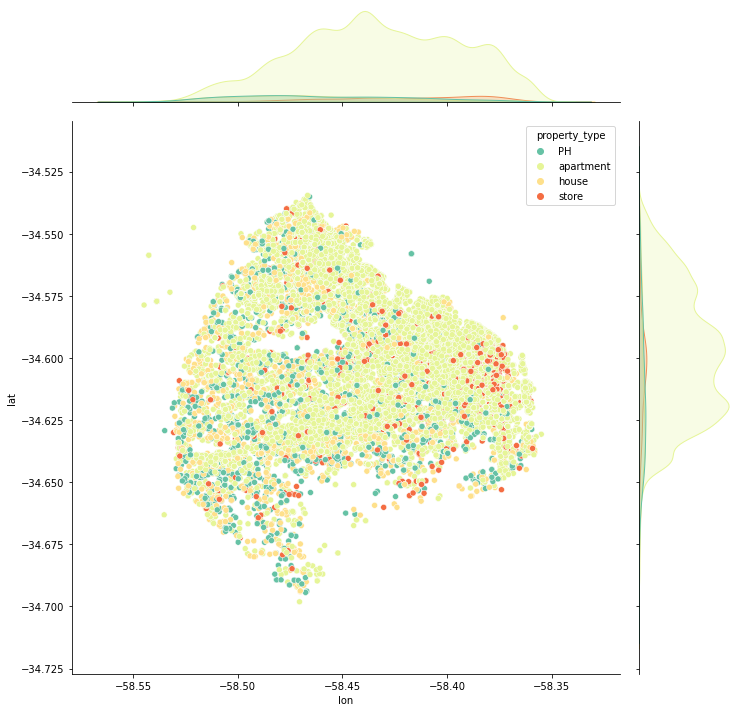

In [308]:
sns.jointplot(data= data_bsas.loc[~(data_bsas['lon']<-59)],
                #.loc[ propiedades_filtro.precio_m2 < 1000 ,:],
                y = 'lat', 
                x = 'lon', 
                hue = "property_type",
                height = 10,
                palette ="Spectral_r",
                #kind = "hex", 
                #kind= "kde"
                )

### Objetivo 2 - Análisis de features

In [309]:
col_nulos = (data_bsas.isnull().sum()/ data_bsas.shape[0] *100).sort_values(ascending= False).round(2)
col_nulos.loc[col_nulos>0]

floor                        90.6900
expenses                     79.6000
rooms                        52.5800
price_usd_per_m2             27.4800
lat-lon                      26.4500
lat                          26.4500
lon                          26.4500
surface_total_in_m2          18.1900
price_per_m2                 15.4500
price_aprox_usd              10.2100
price                        10.2100
currency                     10.2100
price_aprox_local_currency   10.2100
surface_covered_in_m2         7.2400
geonames_id                   3.9800
image_thumbnail               1.5100
dtype: float64

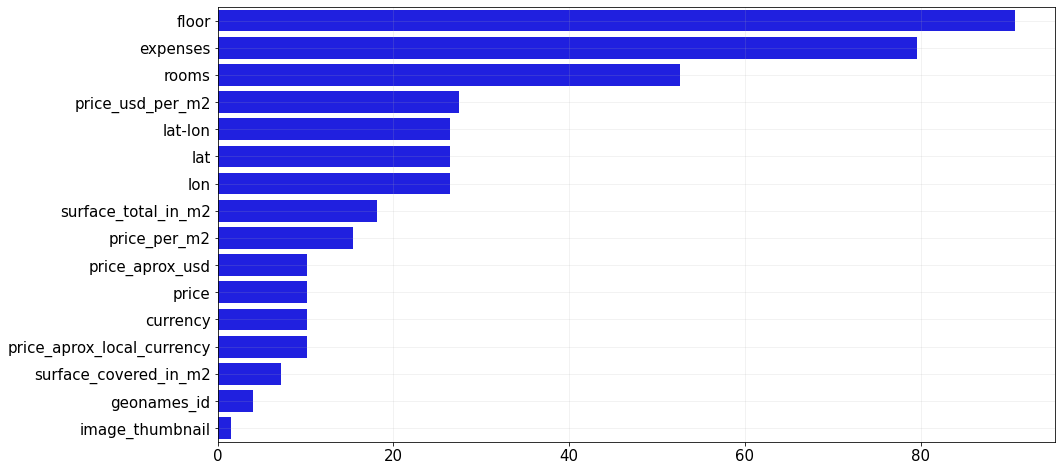

In [310]:
plt.figure(figsize=(15,8))
ax = sns.barplot(y= col_nulos.loc[col_nulos>0].index,
            x= col_nulos.loc[col_nulos>0].values,
            color='blue')
plt.xticks( size=15)
plt.yticks( size=15)
plt.grid(axis="x", alpha=0.2)
plt.grid(axis="y", alpha=0.2)
plt.show()

Las features 'floor', 'expenses' y 'rooms' poseen mas del 50% de valores nulos. Se decide eliminar la features 'floor' ya que posee mas del 90% de valores nulos. Las features 'expenses' y 'rooms' se mantienen y se buscará información relacionada a las mismas en la feature 'description' y 'title'. 

In [311]:
data_bsas = data_bsas.drop(['floor', 'state_name'], axis=1)

Las columnas ```place_with_parent_names, lat-lon, image_thumbnail``` no aportan información al dataset.

In [312]:
data_bsas['place_with_parent_names'].value_counts().values == data_bsas['place_name'].value_counts().values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [313]:
data_bsas = data_bsas.drop(['place_with_parent_names'], axis=1)

In [314]:
data_bsas = data_bsas.drop(['lat-lon'], axis=1)

In [315]:
data_bsas = data_bsas.drop(['image_thumbnail'], axis=1)

In [316]:
data_bsas.select_dtypes('object').describe(include='all').T

,count,unique,top,freq
property_type,32316,4,apartment,27037
place_name,32316,62,Belgrano,2992
currency,29018,3,USD,27826
properati_url,32316,32316,http://www.properati.com.ar/15bo8_venta_ph_mat...,1
description,32316,26094,AVISO LEGAL: Las descripciones arquitectónicas...,358
title,32316,18144,DEPARTAMENTO EN VENTA,2219


#### Columnas Categoricas Analisis de Frecuencias

Se analizarán las columnas categóricas de mayor importancia: ```property_type, currency  y place_name```. 

La mayor cantidad de registros corresponde a ```apartment```, se observa un desbalance de clases que podría ser un problema a futuro. Se mantienen las columna para luego convertirla en variable dummy.

In [317]:
data_bsas['property_type'].value_counts()

apartment    27037
house         2087
PH            1828
store         1364
Name: property_type, dtype: int64

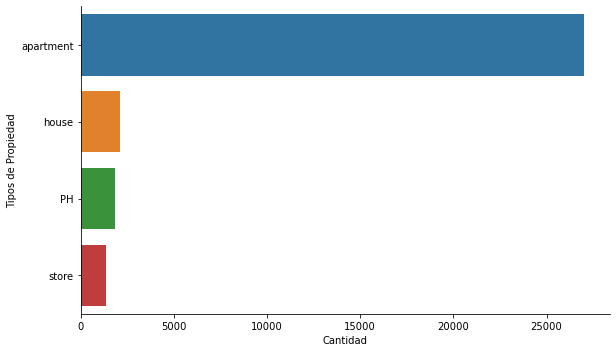

In [318]:
p=sns.catplot(data= data_bsas,
            y='property_type',
            kind= 'count', 
            order= data_bsas['property_type'].value_counts().index
        )
p.set_axis_labels('Cantidad', 'Tipos de Propiedad')
plt.gcf().set_size_inches(10, 5)
plt.show()

En cuanto a barrios se observan 62 valores únicos. La Ciudad de Buenos Aires tienen 48 barrios según la Bibliografia. Luego será necesario limpiar los registros que no corresponden a barrios.

In [319]:
data_bsas['place_name'].value_counts()

Belgrano           2992
Palermo            2885
Caballito          2273
Villa Urquiza      1629
Recoleta           1547
                   ... 
Velez Sarsfield      39
Villa Real           37
Villa Soldati        15
Villa Riachuelo       6
Catalinas             4
Name: place_name, Length: 62, dtype: int64

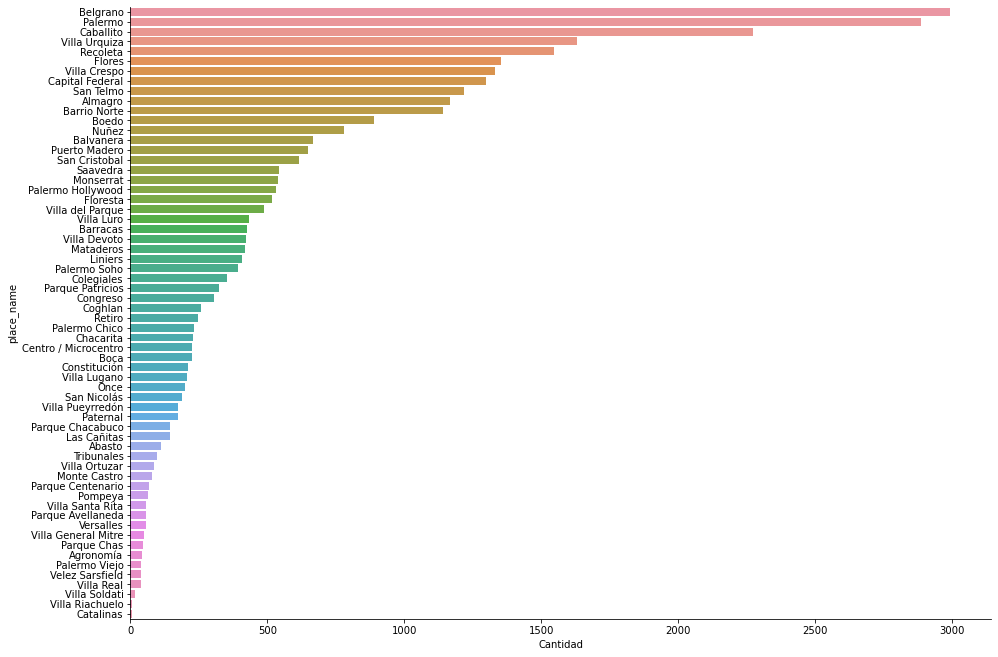

In [320]:
p=sns.catplot(data= data_bsas,
            y='place_name',
            kind= 'count', 
            order= data_bsas['place_name'].value_counts().index
        )
p.set_axis_labels('Cantidad', 'place_name')
plt.gcf().set_size_inches(20, 10)

Existen 3 tipos de monedas en la cual se ofrecen las propiedades. ```ARS, USD, PEN```.

In [321]:
data_bsas['currency'].value_counts()

USD    27826
ARS     1190
PEN        2
Name: currency, dtype: int64

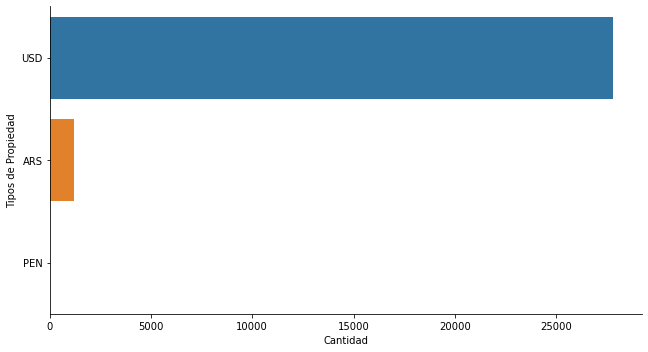

In [322]:
#
p=sns.catplot(data= data_bsas,
            y='currency',
            kind= 'count', 
            order= data_bsas['currency'].value_counts().index
        )
p.set_axis_labels('Cantidad', 'Tipos de Propiedad')
plt.gcf().set_size_inches(10, 5)
plt.show()

A su vez hay 3 columnas con el precio: ```price, price_aprox_local_currency, price_aprox_usd```. 

Revisando la cantidad de nulos de estas columnas se observa que tienen la mismca cantidad de nulos. Esta columnas podrían aportar la misma información. Se analizarán en detalle para obtener una sola columna con el precio en USD.

In [323]:
col_nulos.loc[['price', 'price_aprox_local_currency', 'price_aprox_usd']]

price                        10.2100
price_aprox_local_currency   10.2100
price_aprox_usd              10.2100
dtype: float64

Analizando las columnas ```price``` con ```price_aprox_local_currency``` se observan las relaciones para las 3 tipos de ```currency```. 


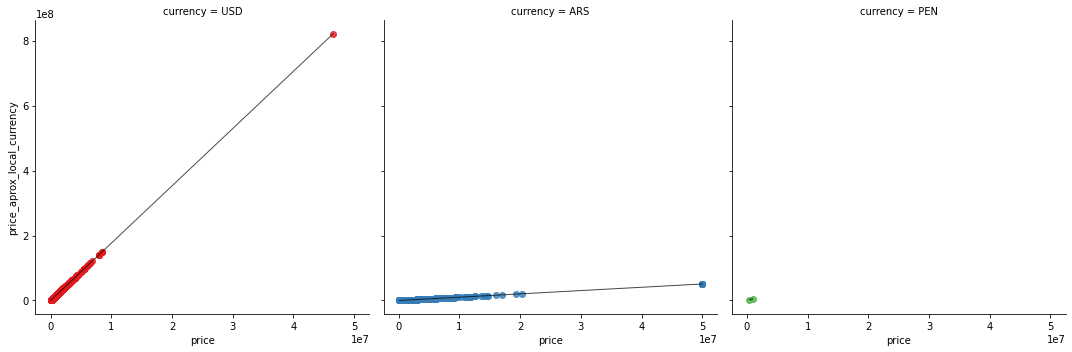

In [324]:
sns.lmplot(data = data_bsas,
           x= 'price', 
           y = 'price_aprox_local_currency', 
           col='currency', 
           hue= 'currency',line_kws={"color":"black","alpha":0.7,"lw":1},
           palette= 'Set1')
plt.show()

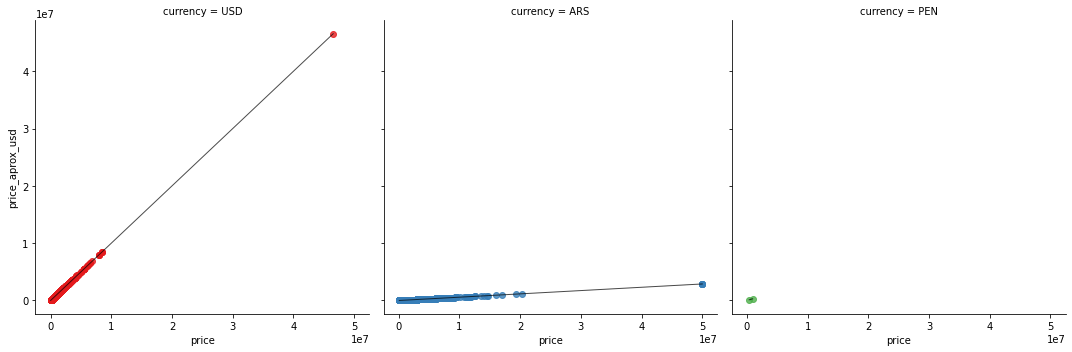

In [325]:
sns.lmplot(data = data_bsas,
           x= 'price', 
           y = 'price_aprox_usd', 
           col='currency', 
           hue= 'currency',line_kws={"color":"black","alpha":0.7,"lw":1},
           palette= 'Set1')
plt.show()

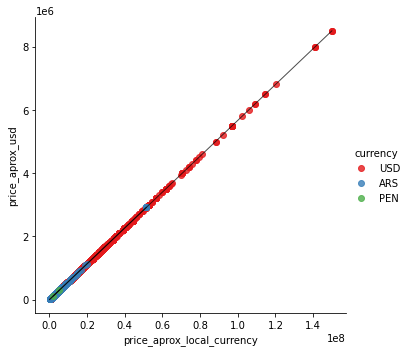

In [326]:
sns.lmplot(data = data_bsas.loc[data_bsas['price_aprox_usd']<4e7],
           x= 'price_aprox_local_currency', 
           y = 'price_aprox_usd', 
           #col='currency', 
           hue= 'currency',line_kws={"color":"black","alpha":0.7,"lw":1},
           palette= 'Set1')
plt.show()

Debido a las relaciones estudiadas se observa que el precio en moneda local ajusta casi perfectamente con el precio en USD. Esto indica que se uso alguna conversión para la transformación a dolares.

In [327]:
pd.options.display.float_format = '{:.4f}'.format

La correlación entre las estas dos variables es 1. Esto motiva a seleccionar solo la columna Precio en USD y eliminar las otras dos. 

In [328]:
data_bsas.loc[:,['price_aprox_local_currency','price_aprox_usd']].corr().style.background_gradient(cmap='coolwarm')

,price_aprox_local_currency,price_aprox_usd
price_aprox_local_currency,1.000000,1.000000
price_aprox_usd,1.000000,1.000000


A su vez, hay solo dos registros con tipo de moneda PEN. Y los mismos tienen precio en USD lo cual justifica la eliminación de la columna currency.

In [329]:
data_bsas.loc[data_bsas['currency']=='PEN']

,property_type,place_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,properati_url,description,title
13309,apartment,Capital Federal,3433955.0000,NaN,NaN,380000.0000,PEN,2066864.9000,117139.3300,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e8z_venta_depart...,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...,DUPLEX A LA VENTA | Liniers 1200 | Tandil
13310,apartment,Capital Federal,3433955.0000,NaN,NaN,950000.0000,PEN,5167162.3500,292848.3300,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e90_venta_depart...,Ref.: 56Duplex en venta de 1 dormitorio con ap...,DUPLEX A LA VENTA | Liniers 1200 | Tandil


In [330]:
data_bsas = data_bsas.drop(['currency', 'price_aprox_local_currency', 'price'], axis=1)

In [331]:
data_bsas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32316 entries, 0 to 32315
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          32316 non-null  object 
 1   place_name             32316 non-null  object 
 2   geonames_id            31030 non-null  float64
 3   lat                    23770 non-null  float64
 4   lon                    23770 non-null  float64
 5   price_aprox_usd        29018 non-null  float64
 6   surface_total_in_m2    26437 non-null  float64
 7   surface_covered_in_m2  29977 non-null  float64
 8   price_usd_per_m2       23434 non-null  float64
 9   price_per_m2           27324 non-null  float64
 10  rooms                  15325 non-null  float64
 11  expenses               6592 non-null   float64
 12  properati_url          32316 non-null  object 
 13  description            32316 non-null  object 
 14  title                  32316 non-null  object 
dtypes:

Finalizando el analisis de frecuencias, se decide eliminar la columna ```properati_url``` ya que no aporta información, es solo el link de acceso a la publicación.

In [332]:
data_bsas = data_bsas.drop(['properati_url'], axis=1)

In [333]:
data_bsas.select_dtypes('object').describe(include='all').T

,count,unique,top,freq
property_type,32316,4,apartment,27037
place_name,32316,62,Belgrano,2992
description,32316,26094,AVISO LEGAL: Las descripciones arquitectónicas...,358
title,32316,18144,DEPARTAMENTO EN VENTA,2219


#### Columnas Numéricas Analisis de Distribuciones

In [334]:
data_bsas.select_dtypes('float').describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
geonames_id,31030.0000,3528151.7643,550474.4903,3427366.0000,3429760.0000,3433775.0000,3436003.0000,6693230.0000
lat,23770.0000,-34.6018,0.0365,-38.4161,-34.6212,-34.6023,-34.5822,-34.5345
lon,23770.0000,-58.4362,0.0525,-63.6167,-58.4653,-58.4376,-58.4040,-58.3550
price_aprox_usd,29018.0000,269603.1829,457579.0287,5103.6100,105000.0000,157261.0000,285000.0000,46545445.0000
surface_total_in_m2,26437.0000,119.2225,1248.2152,0.0000,42.0000,62.0000,110.0000,200000.0000
surface_covered_in_m2,29977.0000,97.7858,1096.6698,0.0000,38.0000,55.0000,95.0000,187000.0000
price_usd_per_m2,23434.0000,3116.9304,3681.0301,13.7975,1966.0628,2468.7500,3076.9231,206333.3333
price_per_m2,27324.0000,6108.1619,23654.0000,3.2086,2190.9174,2777.4194,3590.0000,2600000.0000
rooms,15325.0000,2.7135,1.5434,1.0000,1.0000,3.0000,4.0000,22.0000
expenses,6592.0000,6356.5138,174189.4157,1.0000,1200.0000,2000.0000,3800.0000,10001500.0000


La columna ```geonames_id```no posee valor predictivo es un identificados geográfico. De decide eliminarla. 

In [335]:
data_bsas = data_bsas.drop(['geonames_id'], axis=1)

##### Precio USD

A los fines de conocer como se distribuye el precio se realiza un analisis de su distribución y un boxplot.

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


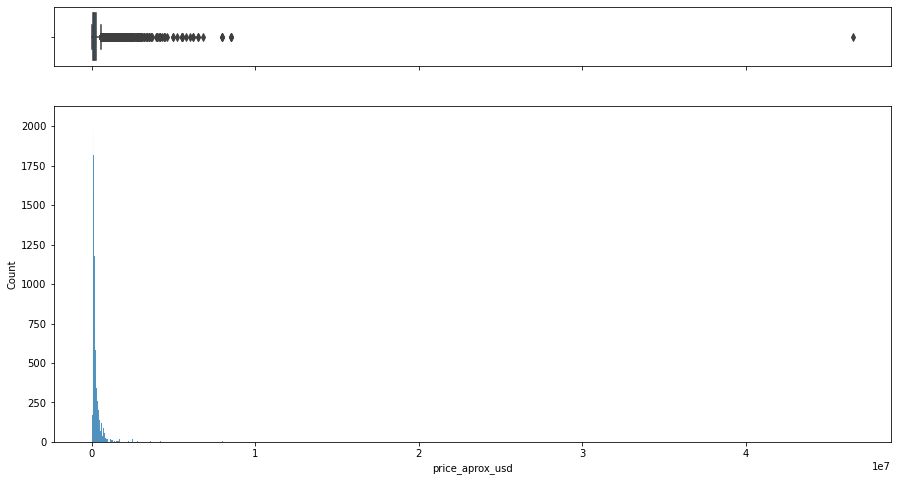

In [336]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data_bsas["price_aprox_usd"], ax=ax_box)
sns.histplot(data=data_bsas, x="price_aprox_usd", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.gcf().set_size_inches(15, 8)
plt.show()

Se observa un valor muy desfasado de la ditribución. Se dedice eliminar el valor atipico. 

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


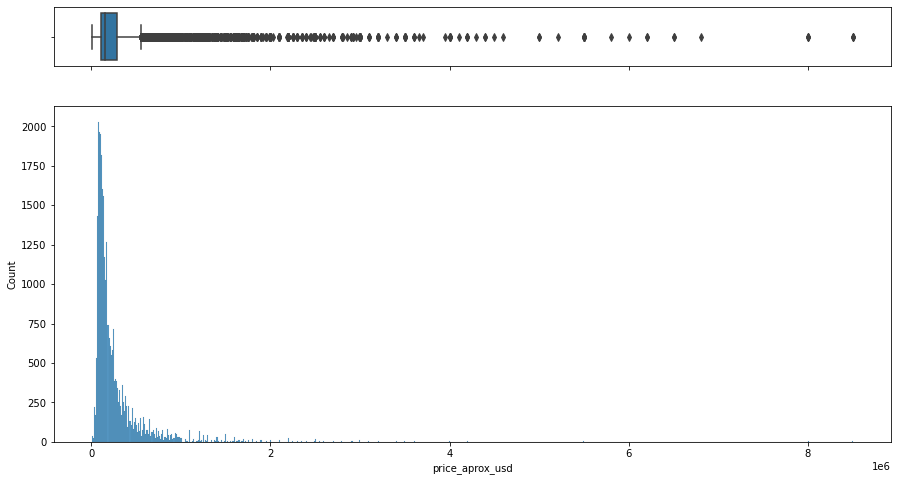

In [337]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data_bsas["price_aprox_usd"].loc[data_bsas["price_aprox_usd"]<4e7], ax=ax_box)
sns.histplot(data=data_bsas.loc[data_bsas["price_aprox_usd"]<4e7], x="price_aprox_usd", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [338]:
data_bsas=data_bsas.loc[data_bsas["price_aprox_usd"]<4e7]

La districuión del precio sigue manteniendo outliers pero se decide conservarlos para futuros análisis. Ya que por ejemplo es posible que sean valores con información valiosa para los barrios mas caros.

##### Superficies

Se analizará la distribución de ambas variables por separado a los fines de conocer su comportamiento. Luego se realizará un plot para ver como se relacionan en conjunto.

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


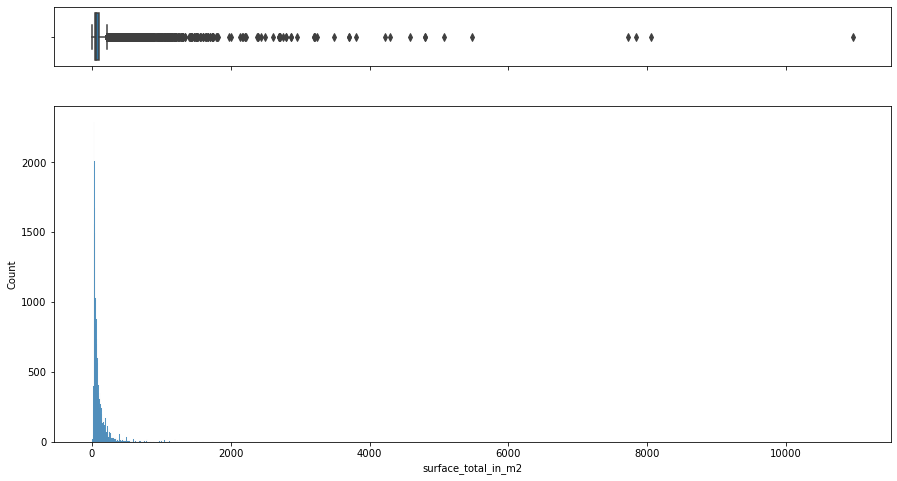

In [339]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data_bsas["surface_total_in_m2"], ax=ax_box)
sns.histplot(data=data_bsas, x="surface_total_in_m2", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.gcf().set_size_inches(15, 8)
plt.show()

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


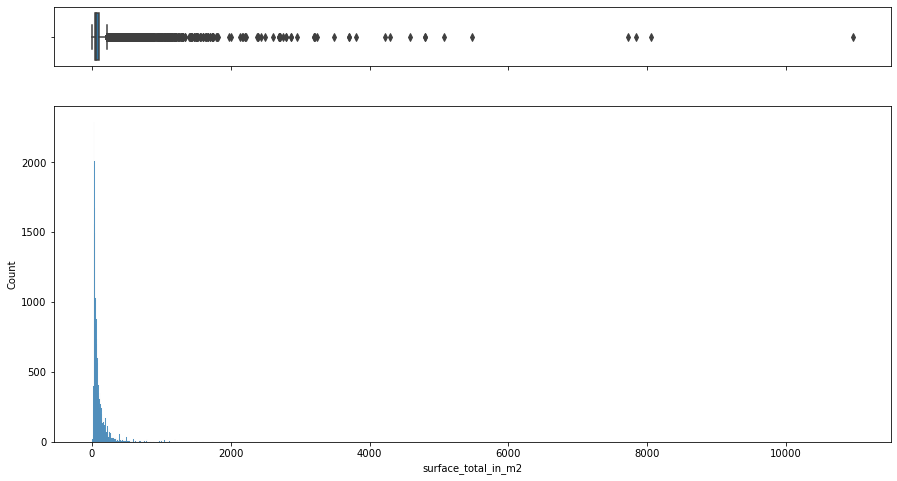

In [340]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data_bsas["surface_total_in_m2"], ax=ax_box)
sns.histplot(data=data_bsas, x="surface_total_in_m2", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.gcf().set_size_inches(15, 8)
plt.show()

Ambas distribuciónes son muy parecidas podrian aportar la misma información. A los fines de conocer un poco mas el comportamiento entre ambas se realiza un diagrama de dispersión entre ellas usando la dimensión ```property_type```para conocer mejor el comportamiento.

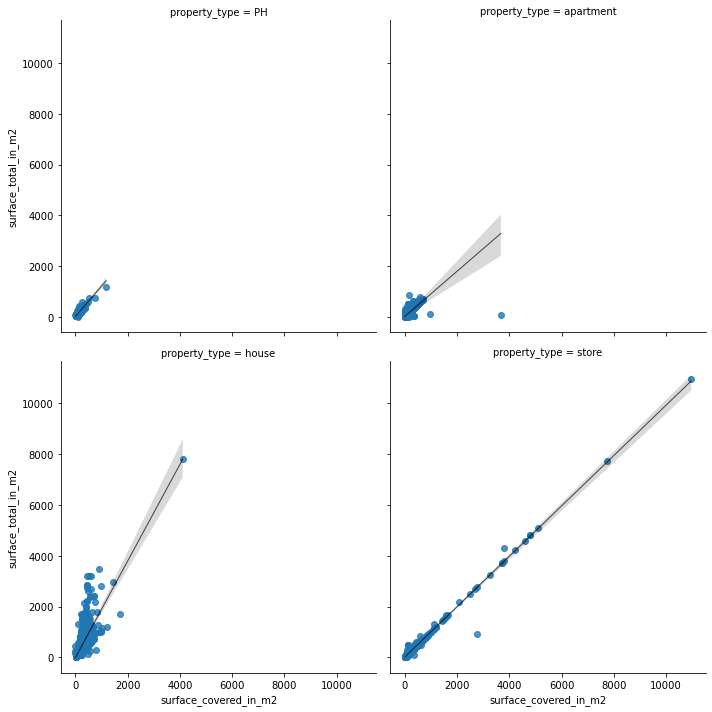

In [341]:
sns.lmplot(data = data_bsas,
           x= 'surface_covered_in_m2', 
           y = 'surface_total_in_m2', 
           col='property_type', col_wrap=2,
           line_kws={"color":"black","alpha":0.7,"lw":1},
           palette= 'Set1')
plt.show()

Claramente existe una asociación entre las variables que varia según el tipo de propiedad. A su vez el rango de variaciación entre los tipos de propiedad es muy grande. Los apartamentos tienen mas restringido el rango mientras que los negocios posee mayor rango. 

Para conocer numéricamente lo expuesto en la descripción anterior se calcularon los estadisticos descriptivos para superficie cubierta y para superficie total. 

In [342]:
data_bsas.loc[:, ['surface_total_in_m2', 'property_type']].groupby(['property_type']).describe()#.agg(['min','mean', 'max','std'])

surface_total_in_m2                                              \
                            count     mean      std     min      25%      50%   
property_type                                                                   
PH                      1266.0000 128.4534  89.2681 10.0000  69.0000 105.0000   
apartment              19908.0000  78.8032  75.5755  0.0000  40.0000  56.0000   
house                   1357.0000 467.9484 493.8999 27.0000 197.0000 301.0000   
store                    915.0000 293.5432 719.4540 10.0000  58.0000 134.0000   

                                   
                   75%        max  
property_type                      
PH            162.0000  1183.0000  
apartment      90.0000  5483.0000  
house         550.0000  7832.0000  
store         270.0000 10958.0000

In [343]:
data_bsas.loc[:, ['surface_covered_in_m2', 'property_type']].groupby(['property_type']).describe()#.agg(['min','mean', 'max','std'])

surface_covered_in_m2                                     \
                              count     mean       std    min      25%   
property_type                                                            
PH                        1676.0000  91.4869   66.0494 1.0000  54.0000   
apartment                22880.0000  80.5488 1242.7037 0.0000  37.0000   
house                     1722.0000 245.5825  264.7105 1.0000 136.0000   
store                     1048.0000 257.5697  665.7534 3.0000  35.0000   

                                             
                   50%      75%         max  
property_type                                
PH             76.0000 113.0000   1183.0000  
apartment      50.0000  80.0000 187000.0000  
house         210.0000 312.5000   8175.0000  
store         100.0000 220.0000  10958.0000

Para conocer el grado de asociación entre estas dos variables se realizaron las correlaciones de Pearson para cada tipo de propiedad y para todo el dataset. 

Los negocios y los PH fueron los que mayor correlación obtuvieron (mayor al 90%), mientras que departamentos y casas obtuvieron 86 y 73%. 



In [344]:
data_bsas.loc[:,['surface_covered_in_m2','surface_total_in_m2', 'property_type']].groupby(['property_type']).corr().style.background_gradient(cmap='coolwarm')

In [345]:
data_bsas.loc[:,['surface_covered_in_m2','surface_total_in_m2']].corr().style.background_gradient(cmap='coolwarm')

,surface_covered_in_m2,surface_total_in_m2
surface_covered_in_m2,1.000000,0.867358
surface_total_in_m2,0.867358,1.000000


Como conclusión hay un alto grado de correlación en estas variables lo cual podria traer inconvenientes al modelado. Se decide mantener la columna de superficie total. Sin embargo existen diferencias en la cantidad de nulos de las columnas. 

In [346]:
data_bsas.loc[:,['surface_covered_in_m2', 'surface_total_in_m2']].isna().sum()/data_bsas.shape[0]*100

surface_covered_in_m2    5.8276
surface_total_in_m2     19.1991
dtype: float64

Antes de realizar una estrategía de imputación se realizará una comparación entre ambas columnas. Es decir buscamos validad la logica ```la superficie cubierta debe ser menor que la superficie total```. 

Existen 94 casos donde la superficie cubierta es mayor que la total. En este caso ```se asume que el valor correcto es el mayor```. Se realizarán los cambios en la variable ```surface_total_in_m2```.

In [347]:
data_bsas.loc[data_bsas['surface_covered_in_m2']>data_bsas['surface_total_in_m2'],['surface_covered_in_m2', 'surface_total_in_m2']]

,surface_covered_in_m2,surface_total_in_m2
82,156.0000,125.0000
83,156.0000,125.0000
354,89.0000,80.0000
1120,147.0000,144.0000
1800,187.0000,159.0000
...,...,...
29681,34.0000,33.0000
30682,74.0000,39.0000
31632,79.0000,59.0000
31634,42.0000,38.0000


In [348]:
data_bsas['surface_total_in_m2'] = data_bsas.apply(lambda x: x['surface_covered_in_m2'] if x['surface_covered_in_m2']>x['surface_total_in_m2'] else x['surface_total_in_m2'], axis = 1)

Validamos la operación de cambio.

In [349]:
data_bsas.loc[data_bsas['surface_covered_in_m2']>data_bsas['surface_total_in_m2'],['surface_covered_in_m2', 'surface_total_in_m2']]

,surface_covered_in_m2,surface_total_in_m2


In [350]:
data_bsas.loc[:,['surface_covered_in_m2', 'surface_total_in_m2']].isna().sum()/data_bsas.shape[0]*100

surface_covered_in_m2    5.8276
surface_total_in_m2     19.1991
dtype: float64

Anilizando un poco mas en detalle los graficos de dispersión entre las variables vemos que PH, store y apartment existe una buena correlación, mayor al 90%. 

In [351]:
data_bsas.loc[:,['surface_covered_in_m2','surface_total_in_m2', 'property_type']].groupby(['property_type']).corr().style.background_gradient(cmap='coolwarm')

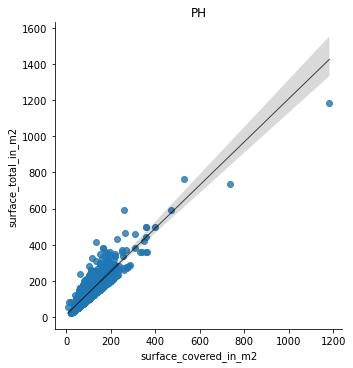

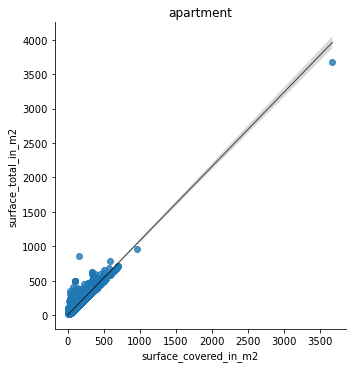

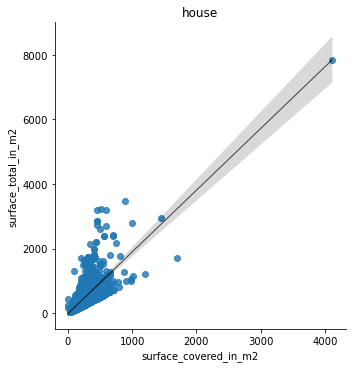

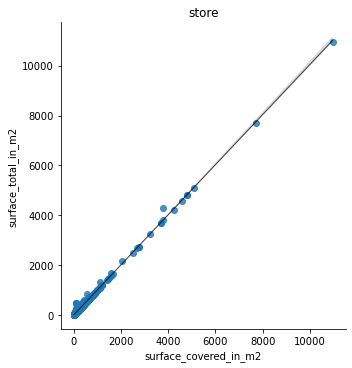

In [352]:
for type in data_bsas['property_type'].unique():
    p = sns.lmplot(data = data_bsas.loc[data_bsas['property_type']==type],
            x= 'surface_covered_in_m2', 
            y = 'surface_total_in_m2', 
            #col='property_type', col_wrap=2,
            line_kws={"color":"black","alpha":0.7,"lw":1},
            palette= 'Set1')
    p.set(title=type)
    plt.show()

In [353]:
data_bsas['property_type'].value_counts()/data_bsas.shape[0]*100


apartment   83.2374
house        6.5031
PH           6.1585
store        4.1010
Name: property_type, dtype: float64

Las casas (house) representan el 4% de los registros, sin embargo la relación entre los precios para las casas es diferente que para las demás variables. 

A continuación se investigará un poco mas al respecto. El objetivo es encontrar un valor de superficie total coherente a los datos que existen. Para ello se calculará la relación que existe entre ambas superficies y ese usará ese factor para imputar los valores de superficie de las casas sin superficie total pero con superficie cubierta.

In [354]:
temp = data_bsas.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2', 'property_type']]

In [355]:
temp['relacion_sup'] = temp['surface_total_in_m2'] / temp['surface_covered_in_m2']

Para conocer un la distruibución y el comportamiento de la relación entre superficies se revisaron los estadisticos descriptivos. Se decide tomar como fector de conversión de la superficie total a la mediana de la relación entre superficies.

In [356]:
temp.groupby('property_type')['relacion_sup'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,1204.0000,1.3512,0.4665,1.0000,1.0623,1.2281,1.4759,9.3333
apartment,19012.0000,inf,NaN,1.0000,1.0000,1.0968,1.1613,inf
house,1274.0000,2.4270,15.0568,1.0000,1.0962,1.3357,1.9943,441.0000
store,829.0000,1.0648,0.2865,1.0000,1.0000,1.0000,1.0000,4.7619


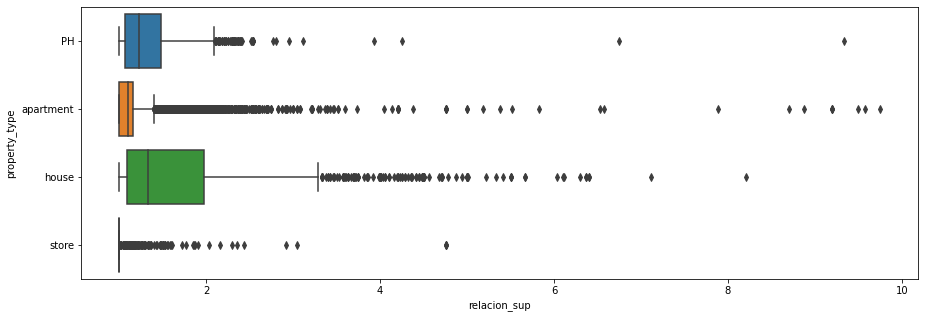

In [357]:
sns.boxplot(data= temp.loc[temp['relacion_sup']<10], y= 'property_type',x = 'relacion_sup')
plt.gcf().set_size_inches(15, 5)
plt.show()

Los factores quedan definidos de la siguiente manera:

In [358]:
factores = {'PH':1.2281, 'apartment': 1.0968, 'house':1.3357, 'store':1 }
factores

{'PH': 1.2281, 'apartment': 1.0968, 'house': 1.3357, 'store': 1}

Se agregran los factores a un dataset temporal que será usado para el calculo de la columna imputada.

In [359]:
temp['factores'] =temp['property_type'].replace(factores)

In [360]:
temp['surface_total_fixed'] =temp.apply(lambda x : (x['surface_covered_in_m2']*x['factores']) if pd.isnull(x['surface_total_in_m2']) else x['surface_total_in_m2'] , axis=1 )

Se observa la cantidad de nulos finales luego de la imputación. Estos nulos corresponden a Nulos en la superficie cubierta y en la superficie total. 

In [361]:
temp.isna().sum() 

surface_total_in_m2      5571
surface_covered_in_m2    1691
property_type               0
relacion_sup             6698
factores                    0
surface_total_fixed       564
dtype: int64

In [362]:
data_bsas['surface_total_fixed'] = temp['surface_total_fixed']

Con el cambio realizado no se modifico en gran medida el comportamiento de las asociaciones de las variables y se redujen una buena cantidad de nulos.

In [363]:
data_bsas.loc[:,['surface_covered_in_m2','surface_total_in_m2', 'surface_total_fixed', 'property_type']].groupby(['property_type']).corr().style.background_gradient(cmap='coolwarm')

In [364]:
data_bsas.loc[:,['surface_covered_in_m2', 'surface_total_in_m2', 'surface_total_fixed']].isna().sum()/data_bsas.shape[0]*100

surface_covered_in_m2    5.8276
surface_total_in_m2     19.1991
surface_total_fixed      1.9437
dtype: float64

In [365]:
#Finalmente solo mantenemos la columna calculada.
# data_bsas = data_bsas.drop(['surface_covered_in_m2', 'surface_total_in_m2'], axis=1)

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


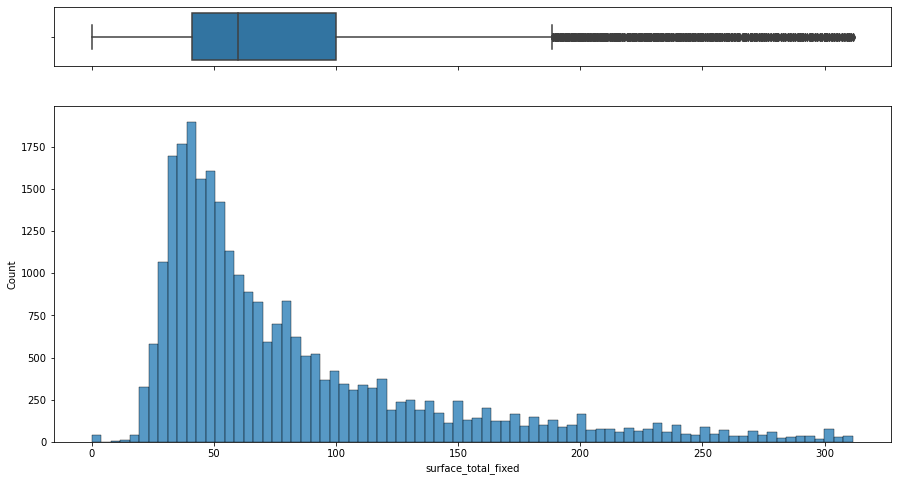

In [366]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data_bsas["surface_total_fixed"].loc[data_bsas["surface_total_fixed"]<312], ax=ax_box)
sns.histplot(data=data_bsas.loc[data_bsas["surface_total_fixed"]<312], x="surface_total_fixed", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [367]:
data_bsas.loc[:,['surface_total_fixed']].describe(percentiles=[0.05,.1, .25, .5, .75, .9, .95])

,surface_total_fixed
count,28453.0000
mean,120.6865
std,1240.4995
min,0.0000
5%,30.0000
10%,34.0000
25%,42.0000
50%,63.0000
75%,111.0000
90%,211.0000


##### Precios por metro_cuadradado

Las columnas ```price_usd_per_m2``` y ```price_per_m2``` serán eliminadas y se calculará un nuevo precio por metro cuadrado en función de la superficie total. 

In [368]:
data_bsas.select_dtypes('float').describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
lat,22181.0000,-34.6013,0.0370,-38.4161,-34.6209,-34.6019,-34.5818,-34.5345
lon,22181.0000,-58.4362,0.0532,-63.6167,-58.4655,-58.4371,-58.4039,-58.3550
price_aprox_usd,29017.0000,268008.3991,368212.8912,5103.6100,105000.0000,157238.0000,285000.0000,8500000.0000
surface_total_in_m2,23446.0000,112.8842,223.6745,0.0000,42.0000,62.0000,111.0000,10958.0000
surface_covered_in_m2,27326.0000,98.4086,1147.7415,0.0000,38.0000,55.0000,96.0000,187000.0000
price_usd_per_m2,23433.0000,3117.0535,3681.0604,13.7975,1966.2921,2468.7500,3076.9231,206333.3333
price_per_m2,27324.0000,6108.1619,23654.0000,3.2086,2190.9174,2777.4194,3590.0000,2600000.0000
rooms,14633.0000,2.7111,1.5378,1.0000,1.0000,3.0000,4.0000,22.0000
expenses,6347.0000,6504.4035,177516.0883,1.0000,1200.0000,2000.0000,3865.5000,10001500.0000
surface_total_fixed,28453.0000,120.6865,1240.4995,0.0000,42.0000,63.0000,111.0000,205101.6000


In [369]:
data_bsas = data_bsas.drop(['price_usd_per_m2', 'price_per_m2'], axis=1)

In [370]:
data_bsas['precio_per_m2'] = data_bsas['price_aprox_usd']/data_bsas['surface_total_fixed']

Existen valores iguales ```inf```debido a que tambien existen registros con superficie total = 0. Los valores con superficie total igual a cero se cuantificarán y serán sacados del análisis.

Se trata de 13 instancias con superficie total igual a cero.

In [371]:
data_bsas.loc[(data_bsas['surface_total_fixed']==0),'surface_total_fixed' ].count()

13

Una vez filtrados los datos el precio por metro cuadrado muestra valores mas realistas.

In [372]:
data_bsas.loc[(data_bsas['surface_total_fixed']>0),'precio_per_m2' ].describe()

count     28440.0000
mean       3311.4971
std       15688.0565
min           2.9254
25%        1911.7647
50%        2405.3839
75%        3023.2558
max     2370532.4581
Name: precio_per_m2, dtype: float64

In [373]:
data_bsas = data_bsas.loc[(data_bsas['surface_total_fixed']>0),: ]

Una vez eliminados los valores erroneos, se calcularon los estadisticos descriptivos incluidos los percenciles p5 y p90 que pueden ser utiles para filtrar los datos a futuro.

In [374]:
data_bsas.loc[:,['precio_per_m2']].describe(percentiles=[0.05,.1, .25, .5, .75, .9, .95])


,precio_per_m2
count,28440.0000
mean,3311.4971
std,15688.0565
min,2.9254
5%,1106.1481
10%,1409.0909
25%,1911.7647
50%,2405.3839
75%,3023.2558
90%,4305.6020


La distribucion del precio por metro cuadrado muestra signos de normalidad cuando filtramos los datos superiores al p90.

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


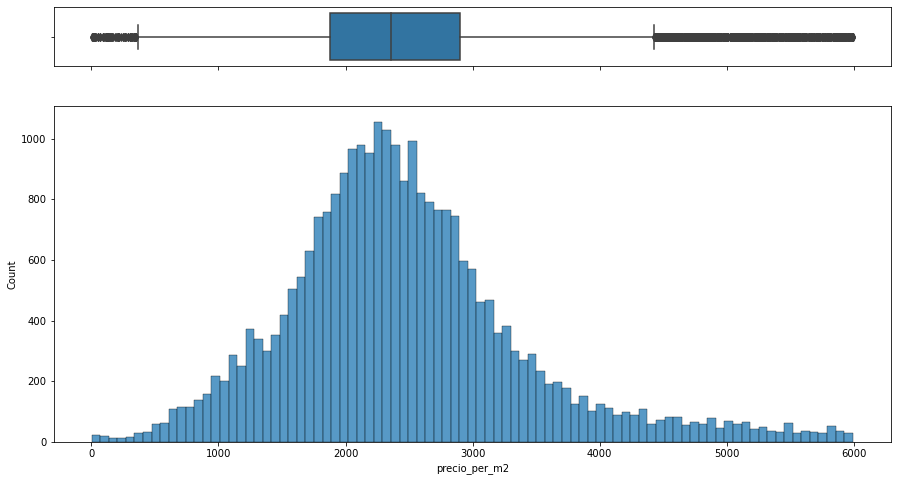

In [375]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data_bsas["precio_per_m2"].loc[data_bsas["precio_per_m2"]<6000], ax=ax_box)
sns.histplot(data=data_bsas.loc[data_bsas["precio_per_m2"]<6000], x="precio_per_m2", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [376]:
#Finalmente solo mantenemos la columna calculada.
data_bsas = data_bsas.drop(['surface_covered_in_m2', 'surface_total_in_m2'], axis=1)

In [377]:
data_bsas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28440 entries, 0 to 32315
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        28440 non-null  object 
 1   place_name           28440 non-null  object 
 2   lat                  21701 non-null  float64
 3   lon                  21701 non-null  float64
 4   price_aprox_usd      28440 non-null  float64
 5   rooms                14428 non-null  float64
 6   expenses             6270 non-null   float64
 7   description          28440 non-null  object 
 8   title                28440 non-null  object 
 9   surface_total_fixed  28440 non-null  float64
 10  precio_per_m2        28440 non-null  float64
dtypes: float64(7), object(4)
memory usage: 2.6+ MB


##### Rooms

Antes de evaluar alguna estratégia de inputación en ```rooms``` es necesario conocer la relación entre la misma y nuestras variables target. Las variables target son `precio` y `precio por metro cuadrado`. 

In [378]:
(data_bsas.isna().sum()/data_bsas.shape[0]*100).sort_values()

property_type          0.0000
place_name             0.0000
price_aprox_usd        0.0000
description            0.0000
title                  0.0000
surface_total_fixed    0.0000
precio_per_m2          0.0000
lat                   23.6955
lon                   23.6955
rooms                 49.2686
expenses              77.9536
dtype: float64

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


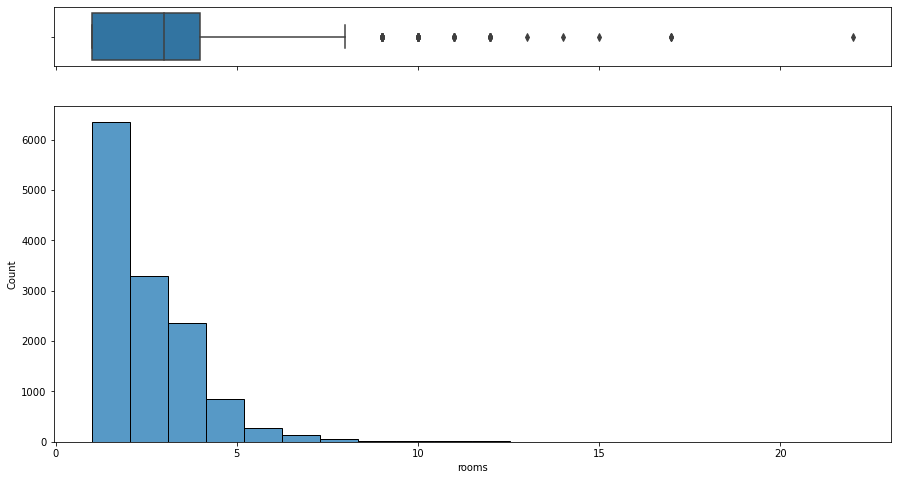

In [379]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data_bsas["rooms"], ax=ax_box)
sns.histplot(data=data_bsas.loc[data_bsas["precio_per_m2"]<6000],bins=20, x="rooms",ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.gcf().set_size_inches(15, 8)
plt.show()

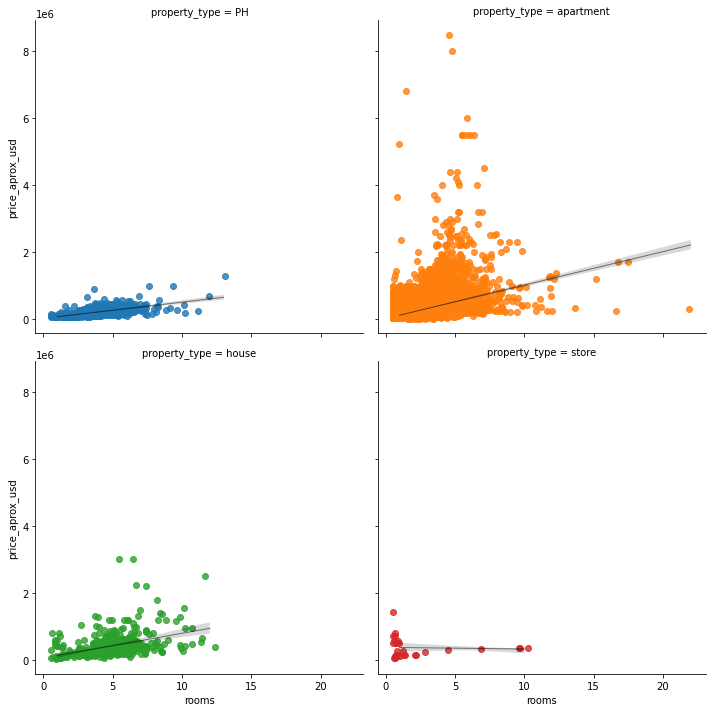

In [380]:
sns.lmplot(data = data_bsas.loc[data_bsas['surface_total_fixed']<5e4],
            x= 'rooms', 
            y = 'price_aprox_usd', x_jitter = 0.5,hue="property_type",
            col='property_type', col_wrap=2, 
            line_kws={"color":"black","alpha":0.5,"lw":1})


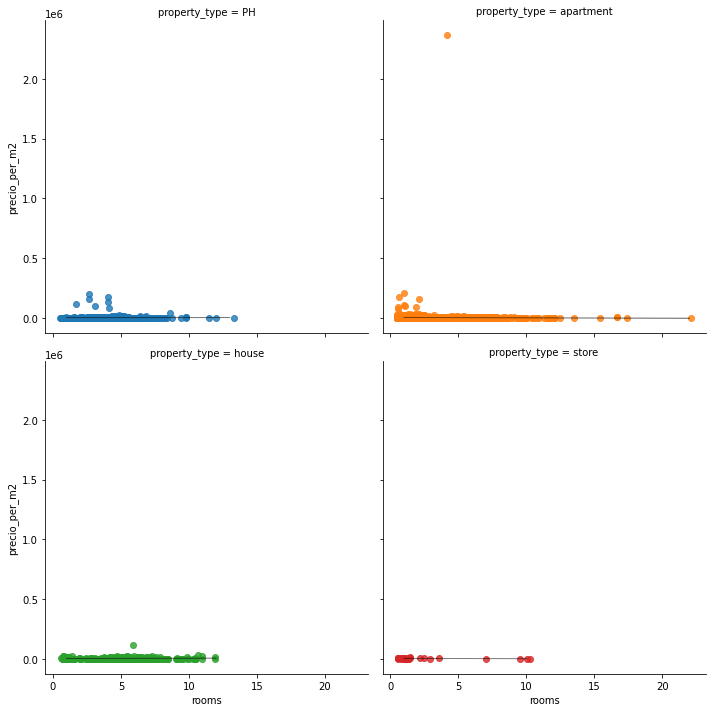

In [381]:
sns.lmplot(data = data_bsas.loc[data_bsas['surface_total_fixed']<5e4],
            x= 'rooms', 
            y = 'precio_per_m2', x_jitter = 0.5,hue="property_type",
            col='property_type', col_wrap=2, 
            line_kws={"color":"black","alpha":0.5,"lw":1})

In [382]:
data_bsas.loc[:,['precio_per_m2','rooms','price_aprox_usd', 'property_type']].groupby(['property_type']).corr().style.background_gradient(cmap='coolwarm')

Text(0.5, 1.0, 'Coeficientes de correlación (Pearson)')

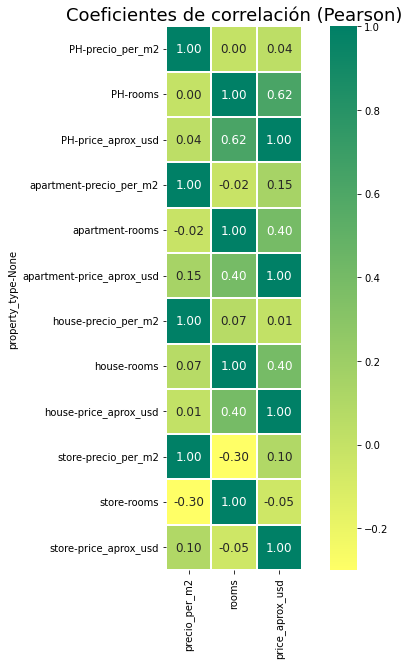

In [383]:
plt.figure(figsize = (15,7))
sns.heatmap(data_bsas.loc[:,['precio_per_m2','rooms','price_aprox_usd', 'property_type']].groupby(['property_type']).corr().round(2), 
            cbar = True, 
            square = True, 
            annot=True, 
            fmt= '.2f',
            annot_kws={'size': 12}, 
            cmap= 'summer_r', 
            linewidths=1)
plt.xticks(rotation = 90)
#plt.yticks(rotation = 45)
plt.gcf().set_size_inches(10, 10)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "black")

Como se pudo observar el grado de correlación entre `rooms` y las variables target es muy bajo `0.62` en el mejor de los casos (PH, precio vs rooms).

##### Expenses

Expenses posee un 78% de valores nulos. Imputar un 78% no es una buena decisión, se decide eliminar la columnas.

In [386]:
(data_bsas.isna().sum()/data_bsas.shape[0]*100).sort_values()

property_type          0.0000
place_name             0.0000
price_aprox_usd        0.0000
description            0.0000
title                  0.0000
surface_total_fixed    0.0000
precio_per_m2          0.0000
lat                   23.6955
lon                   23.6955
rooms                 49.2686
dtype: float64

In [385]:
data_bsas = data_bsas.drop(['expenses'], axis=1)

##### Agrupacion de la columna place_name en funcion del precio

La columna `place_name` aporta valiosa información geográfica, pero resulta poco práctico hacer una variable dummy por cada posibilidad de esta variables (se trata 62 valores únicos).

Razón por la cual se decidió agrupar estos valores únicos usando el precio por metro cuadradado y quintiles. 

In [388]:
data_bsas.groupby(["place_name"]).mean()[["precio_per_m2"]].sort_values("precio_per_m2", ascending= False).reset_index()

,place_name,precio_per_m2
0,Villa Santa Rita,20045.9449
1,Versalles,13038.8142
2,Boedo,10249.0799
3,Puerto Madero,10188.7997
4,San Cristobal,8516.1416
...,...,...
57,Constitución,1766.5153
58,Parque Avellaneda,1665.1013
59,Mataderos,1621.7158
60,Villa Real,1525.9159


Para separar los quintiles se una la función pd.qcut() y se separa en 5 quintiles. 

In [389]:
pd.qcut(data_bsas['precio_per_m2'], 5,labels= ["Q1", "Q2","Q3","Q4","Q5"])

0        Q1
1        Q1
3        Q4
4        Q4
5        Q3
         ..
32311    Q3
32312    Q3
32313    Q5
32314    Q4
32315    Q1
Name: precio_per_m2, Length: 28440, dtype: category
Categories (5, object): ['Q1' < 'Q2' < 'Q3' < 'Q4' < 'Q5']

Para conocer mejor los valores de la variable se investiga sobre los valores numericos de los mismos, adicionando el p5 y p95 que son utiles para filtrar el dataset si fuera necesario.

In [433]:
data_bsas['precio_per_m2'].describe(percentiles=[.05,.2,.4,.6,.8, .95])

count     28440.0000
mean       3311.4971
std       15688.0565
min           2.9254
5%         1106.1481
20%        1786.6536
40%        2222.2222
50%        2405.3839
60%        2619.0476
80%        3246.7532
95%        6071.4625
max     2370532.4581
Name: precio_per_m2, dtype: float64

Se calculan tambien mediante el uso de numpy y listas por comprensión.

In [434]:
q_preciom2 = [ np.percentile(data_bsas['precio_per_m2'], p) for p in range(20, 101, 20)]
q_preciom2

[1786.6536352519731,
 2222.222222222222,
 2619.0476190476193,
 3246.753246753247,
 2370532.4580598106]

Se generá un dataset temporal para no afectar el que se viene elaborando.

In [406]:
temp2 = data_bsas

In [413]:
pd.qcut(data_bsas['precio_per_m2'], 5).unique()

[(2.924, 1786.654], (2619.048, 3246.753], (2222.222, 2619.048], (3246.753, 2370532.458], (1786.654, 2222.222]]
Categories (5, interval[float64, right]): [(2.924, 1786.654] < (1786.654, 2222.222] < (2222.222, 2619.048] < (2619.048, 3246.753] < (3246.753, 2370532.458]]

Finalmente se calculan lo quintiles y se observa en un grafico la asignaición.

In [408]:
temp2['place_category'] = pd.qcut(data_bsas['precio_per_m2'], 
                                  5, 
                                  labels= ["Q1", "Q2","Q3","Q4","Q5"])

In [410]:
temp2.head(2)

,property_type,place_name,lat,lon,price_aprox_usd,rooms,description,title,surface_total_fixed,precio_per_m2,place_category
0,PH,Mataderos,-34.6618,-58.5088,62000.0000,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,55.0000,1127.2727,Q1
1,apartment,Mataderos,-34.6523,-58.5230,72000.0000,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,55.0000,1309.0909,Q1


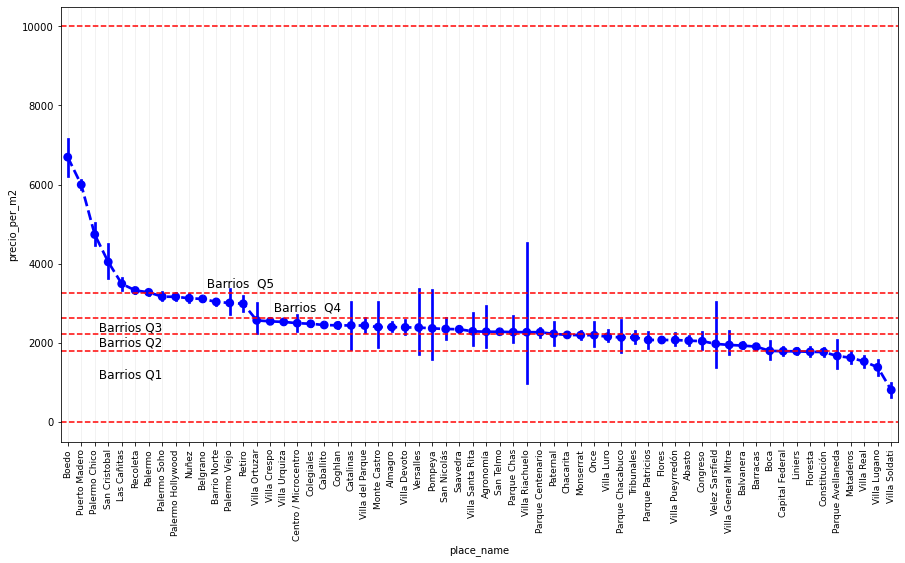

In [437]:
plt.figure(figsize=(15,8))
ax = sns.pointplot(x="place_name", y="precio_per_m2", 
                   data=temp2.loc[temp2['precio_per_m2']<20000], errorbar = 'sd',
                   linestyles=["--"],
                   color = "blue",
                   order= temp2.loc[temp2['precio_per_m2']<20000].groupby(["place_name"]).mean()[["precio_per_m2"]].sort_values("precio_per_m2", ascending= False).index)
plt.xticks(rotation=90, size=9)
plt.axhline(y= 2.924, color = "r", linestyle= "--")
plt.axhline(y= q_preciom2[0], color = "r", linestyle= "--")
plt.axhline(y= q_preciom2[1], color = "r", linestyle= "--")
plt.axhline(y= q_preciom2[2], color = "r", linestyle= "--")
plt.axhline(y= q_preciom2[3], color = "r", linestyle= "--")
plt.axhline(y= 10000, color = "r", linestyle= "--")
plt.text(2, 1200, ' Barrios Q1', size=12, ha='left', va='center')
plt.text(2, 2000, ' Barrios Q2', size=12, ha='left', va='center')
plt.text(2, 2400, ' Barrios Q3', size=12, ha='left', va='center')
plt.text(15, 2900, ' Barrios  Q4', size=12, ha='left', va='center')
plt.text(10, 3500, ' Barrios  Q5', size=12, ha='left', va='center')
plt.grid(axis="x", alpha=0.2)

Finalmente se asigna al dataset la columna calculada y se elimina la columna place_name.

In [438]:
data_bsas['place_category'] = temp2['place_category']

In [442]:
data_bsas = data_bsas.drop(['place_name'], axis =1)

In [443]:
(data_bsas.isna().sum()/data_bsas.shape[0]*100).sort_values()

property_type          0.0000
price_aprox_usd        0.0000
description            0.0000
title                  0.0000
surface_total_fixed    0.0000
precio_per_m2          0.0000
place_category         0.0000
lat                   23.6955
lon                   23.6955
rooms                 49.2686
dtype: float64

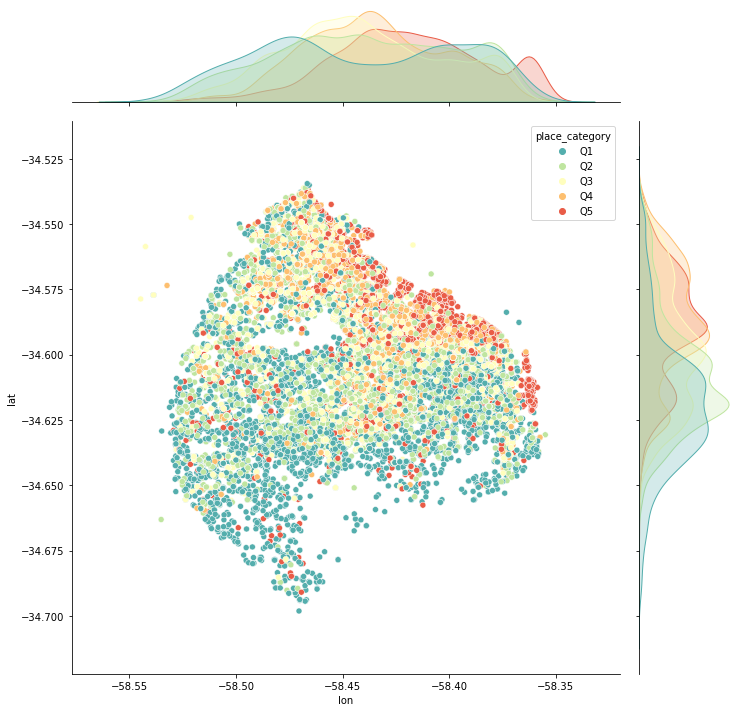

In [444]:
sns.jointplot(data=data_bsas.loc[~(data_bsas['lon']<-59)],
                #.loc[ propiedades_filtro.precio_m2 < 1000 ,:],
                y = 'lat', 
                x = 'lon', 
                hue = "place_category",
                height = 10,
                palette ="Spectral_r",
                #kind = "hex", 
                #kind= "kde"
                )

In [445]:
pd.get_dummies(data_bsas["place_category"]).reset_index(drop= True)

,Q1,Q2,Q3,Q4,Q5
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
28435,0,0,1,0,0
28436,0,0,1,0,0
28437,0,0,0,0,1
28438,0,0,0,1,0


In [446]:
pd.get_dummies(data_bsas["property_type"]).reset_index(drop= True)

,PH,apartment,house,store
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
28435,0,1,0,0
28436,0,1,0,0
28437,0,1,0,0
28438,0,1,0,0
